In [107]:
import pandas as pd
import matplotlib.pyplot as plt

import os

churn_data=pd.read_csv("socialnet7_dataset.csv", index_col=[0,1])

churn_data=churn_data[churn_data['post_per_month'] != 0]

In [108]:
churn_data

,,is_churn,like_per_month,newfriend_per_month,post_per_month,adview_per_month,dislike_per_month,unfriend_per_month,message_per_month,reply_per_month,account_tenure
account_id,observation_date,,,,,,,,,,
15,2020-02-09,False,110.0,6.0,49.0,51.0,2.0,0.0,13.0,1.0,26.0
81,2020-02-09,False,24.0,1.0,11.0,15.0,7.0,0.0,161.0,14.0,26.0
127,2020-02-09,False,54.0,6.0,22.0,60.0,29.0,0.0,17.0,2.0,26.0
153,2020-02-09,False,128.0,18.0,58.0,39.0,5.0,0.0,5.0,1.0,26.0
177,2020-02-09,False,768.0,11.0,53.0,109.0,33.0,0.0,12.0,9.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
13132,2020-05-10,False,19.0,0.0,20.0,2.0,3.0,0.0,27.0,6.0,25.0
13141,2020-05-10,False,3.0,1.0,6.0,9.0,1.0,0.0,13.0,5.0,25.0
13155,2020-05-10,False,2.0,0.0,1.0,1.0,1.0,0.0,27.0,17.0,25.0


In [109]:
ncohort = 10
[i for i in range(1, ncohort + 1)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [110]:
groups = pd.qcut(churn_data["post_per_month"], ncohort, duplicates='drop')

de 85 a 3255 son los que tienen menos 

se empieza a agrandar 

son valores no repetidos


In [111]:
cohort_means = churn_data.groupby(groups, observed=False)["post_per_month"].mean()

In [112]:
cohort_churns = churn_data.groupby(groups, observed=False)["is_churn"].mean()

In [113]:
plot_frame = pd.DataFrame(
    {
        'post_per_month': cohort_means.values,
        'churn_rate' : cohort_churns.values
    })

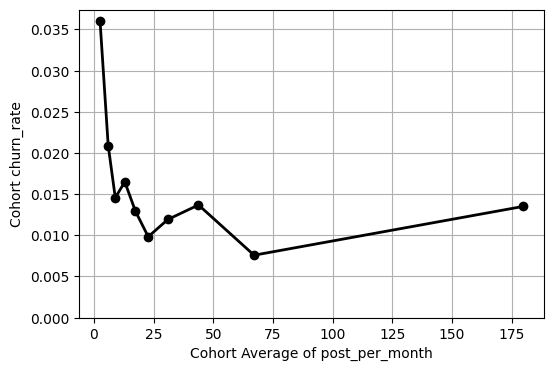

In [120]:
plt.figure(figsize=(6,4))
plt.plot('post_per_month', 'churn_rate', data=plot_frame, label='post_per_month', marker='o', linewidth=2, color='black')
plt.xlabel("Cohort Average of post_per_month")
plt.ylabel("Cohort churn_rate")
plt.grid()
plt.gca().set_ylim(bottom=0)
#plt.gca().set_xscale('log')
plt.savefig("socialnet7_dataset_post_per_month_churn_cohort.png")

mean zero

is average is zero

1 standard deviation above or below the average

if 1 or -1


